Story:
Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.
He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market 
you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.
Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) 
and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.
In this problem you do not have to predict actual price but a price range indicating how high the 
price is

Source of data: https://www.kaggle.com/iabhishekofficial/mobile-price-classification 

Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

First we should read the data

In [2]:
data = pd.read_csv('train.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [3]:
data['price_range'].value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

In [4]:
data.shape

(2000, 21)

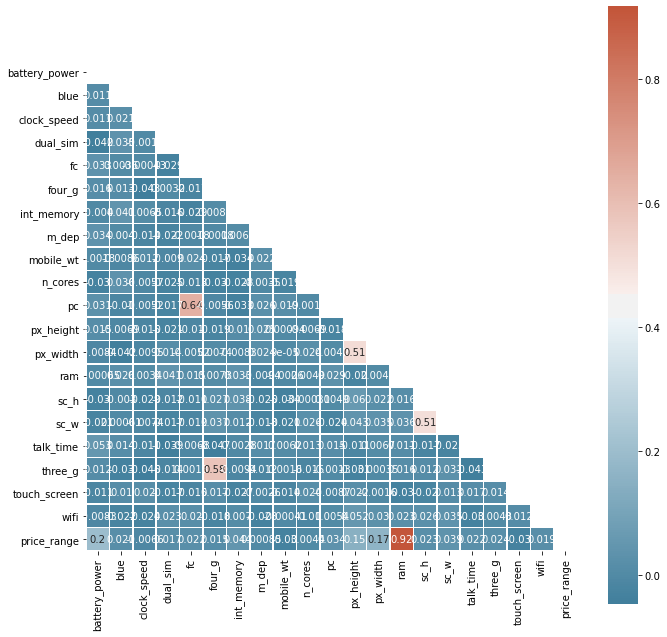

In [5]:
corr = data.corr()
f, ax = plt.subplots(figsize=(11, 11))
mask = np.triu(np.ones_like(corr, dtype=bool)) # removing the other side of the heatmap
cmap = sns.diverging_palette(230, 20, as_cmap=True) #preparing cmap
sns.heatmap(corr,mask=mask,cmap=cmap,linewidths=.5,square=True,annot=True)
plt.show()

Modeling and prediction

In [6]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [7]:
# defining the X & Y variables:

y= data['price_range']
X=data[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']]

In [8]:
X.shape

(2000, 20)

In [9]:
# splitting the data:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=100)

In [29]:
# fit the regression model:
from sklearn.linear_model import LogisticRegression

logistic_reg = LogisticRegression(max_iter=500).fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
# Accuracy score of our Logistic Regression:
print('Accuracy score logistic regression: ', logistic_reg.score(X_test, y_test))

Accuracy score logistic regression:  0.665


In [12]:
# price_range prediction:
log_predict = logistic_reg.predict(X_test)
pd.Series(log_predict).value_counts()

3    117
0     98
1     93
2     92
dtype: int64

In [13]:
# now we form the confusion matrix:
from sklearn.metrics import confusion_matrix
cf_matrix= confusion_matrix(y_test, log_predict)
print(cf_matrix)

[[82 18  0  0]
 [15 53 26  5]
 [ 1 22 46 27]
 [ 0  0 20 85]]


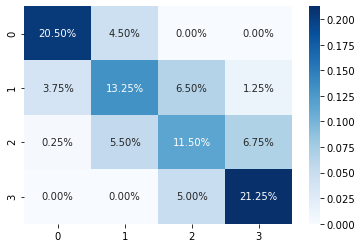

In [14]:
# visualize the matrix:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [15]:
# 20.50% of the total mobile phones are in price range of 0, and we predicted that they are in range 0. 
# 13.25% of the total mobile phones are in price range of 1, and we predicted that they are in range 1. 
# 11.50% of the total mobile phones are in price range of 2, and we predicted that they are in range 2. 
# 21.25% of the total mobile phones are in price range of 3, and we predicted that they are in range 3. 


In [16]:
# in order to get a better understanidg of our prediction accuracy, we calculate the 
# Recall and Precision score:

from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision score:', precision_score(y_test, log_predict, average=None))
print('Recall score:', recall_score(y_test, log_predict, average=None))
print('f1 score:', f1_score(y_test, log_predict, average=None))

Precision score: [0.83673469 0.56989247 0.5        0.72649573]
Recall score: [0.82       0.53535354 0.47916667 0.80952381]
f1 score: [0.82828283 0.55208333 0.4893617  0.76576577]


In [17]:
# interpretation for range 0:
# precision is vertically: 82/82+15 = 83%
# precision score is 83% = (TP/TP+FP) = out of all mobile phones that we said are in price range 0,
# 83% are actually within range 0. i.e. out of 98 mobile phones , only 81 phones are actually within 0 range.

# recall is horizontally:
# Recall score (sensitivity) is 82%=(TP/TP+FN)= of all phones that are actually in range 0, we identified only 82 
# of them: 82/82+18 = 82%


# interpretation for range 2:
# precision score is 50% = (TP/TP+FP) = out of all mobile phones that we said are in price range 2,
# 50% are actually within range 2. i.e. out of 92 mobile phones , only 46 phones are actually within 2 range.

# Recall score (sensitivity) is 48%=(TP/TP+FN)= of all phones that are actually in range 2, we identified only 48%.


In [18]:
# to do overall precision and recall:
print('Overall Precision score:', precision_score(y_test, log_predict, average='macro'))
print('Overall Recall score:', recall_score(y_test, log_predict, average='macro'))
print('Overall f1 score:', f1_score(y_test, log_predict, average='macro'))

Overall Precision score: 0.6582807233728893
Overall Recall score: 0.6610110028860029
Overall f1 score: 0.6588734073773967


In [19]:
# Balance accuracy score
#balanced_accuracy_score is the average of recall obtained on each class.

from sklearn.metrics import balanced_accuracy_score
print('balance accuracy score:', balanced_accuracy_score(y_test, log_predict))

balance accuracy score: 0.6610110028860029


### In order to get a better prediction, we improve the model and use  decision Tree

In [42]:
# DecisionTree:
# link from Filipa: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

from sklearn.tree import DecisionTreeClassifier
dtc_reg=DecisionTreeClassifier(random_state=100).fit(X_train, y_train)
print('Accuracy score Decision tree: ', dtc_reg.score(X_test, y_test))


Accuracy score Decision tree:  0.8025


In [43]:
#prediction with decision tree:
dtc_predict=dtc_reg.predict(X_test)
pd.Series(dtc_predict).value_counts()

1    103
2    102
3     98
0     97
dtype: int64

In [44]:
# conusion matrix for decision tree:
cf_matrix_dtc= confusion_matrix(y_test, dtc_predict)
print(cf_matrix_dtc)

[[90 10  0  0]
 [ 7 78 14  0]
 [ 0 15 68 13]
 [ 0  0 20 85]]


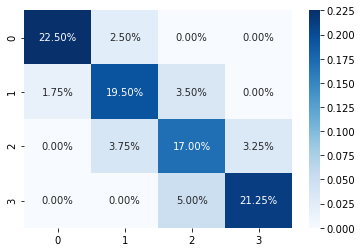

In [45]:
# visualize the matrix for decision tree:
sns.heatmap(cf_matrix_dtc/np.sum(cf_matrix_dtc), annot=True, 
            fmt='.2%', cmap='Blues')

In [46]:
print('Decion Tree Precision score:', precision_score(y_test, dtc_predict, average=None))
print('Decion Tree Recall score:', recall_score(y_test, dtc_predict, average=None))
print('Decion Tree f1 score:', f1_score(y_test, dtc_predict, average=None))

Decion Tree Precision score: [0.92783505 0.75728155 0.66666667 0.86734694]
Decion Tree Recall score: [0.9        0.78787879 0.70833333 0.80952381]
Decion Tree f1 score: [0.91370558 0.77227723 0.68686869 0.83743842]


In [47]:
# decision tree interpretation for range 0: 
# precision, we divide vertically
# precision score is 92.7% = (TP/TP+FP) = out of all mobile phones that we said are in price range 0,
# 92.7% are actually within range 0. i.e. out of 97 mobile phones , only 90 phones are actually within 0 range.
# precision = 90/90+7 = 92.7%

# recall, we divide horizontally:
# Recall score (sensitivity) is 90%=(TP/TP+FN)= of all phones that are actually in range 0, we identified only 90% 
# of them: 90/90+10 = 90%



In [48]:
print('Overall Decion Tree Precision score:', precision_score(y_test, dtc_predict, average='macro'))
print('Overall Decion Tree Recall score:', recall_score(y_test, dtc_predict, average='macro'))
print('Overall Decion Tree f1 score:', f1_score(y_test, dtc_predict, average='macro'))

Overall Decion Tree Precision score: 0.8047825525966567
Overall Decion Tree Recall score: 0.8014339826839827
Overall Decion Tree f1 score: 0.8025724804982812


In [52]:
# feature importance of decision tree regression is the importance of each feature (variable):
#The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. 
#It is also known as the Gini importance.
#dtc_reg.feature_importances_
print(dict(zip(X.columns, dtc_reg.feature_importances_)))

{'battery_power': 0.09293925455925657, 'blue': 0.0, 'clock_speed': 0.0038889739601942665, 'dual_sim': 0.001333362500638034, 'fc': 0.010248762203369101, 'four_g': 0.0, 'int_memory': 0.01217026289449748, 'm_dep': 0.006509401652420402, 'mobile_wt': 0.015652900399929316, 'n_cores': 0.0015079694947692061, 'pc': 0.00583213816003283, 'px_height': 0.10224978689656618, 'px_width': 0.08960704064225912, 'ram': 0.6434945825980056, 'sc_h': 0.003869718488475772, 'sc_w': 0.001250027344348157, 'talk_time': 0.005932669459684111, 'three_g': 0.0015686617654565112, 'touch_screen': 0.0, 'wifi': 0.001944486980097133}


### K-Nearest Neighbors

In [54]:
from sklearn.neighbors import KNeighborsClassifier

knn_reg = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
knn_predict = knn_reg.predict(X_test)
print(knn_reg.score(X_test, y_test))
print(pd.Series(knn_predict).value_counts())


0.92
3    104
0    102
1     98
2     96
dtype: int64


In [55]:
print('Overall KNN Precision score:', precision_score(y_test, knn_predict, average='macro'))
print('Overall KNN Recall score:', recall_score(y_test, knn_predict, average='macro'))
print('Overall KNN f1 score:', f1_score(y_test, knn_predict, average='macro'))

Overall KNN Precision score: 0.9189656631883523
Overall KNN Recall score: 0.919186507936508
Overall KNN f1 score: 0.9190413689712545


### Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

In [56]:
from sklearn.svm import SVC

svm = SVC().fit(X_train, y_train)
svm_predict = svm.predict(X_test)
print(svm.score(X_test, y_test))
print(pd.Series(svm_predict).value_counts())

0.9425
3    105
0    102
1     98
2     95
dtype: int64


In [57]:
print('Overall SVM Precision score:', precision_score(y_test, svm_predict, average='macro'))
print('Overall SVM Recall score:', recall_score(y_test, svm_predict, average='macro'))
print('Overall SVM f1 score:', f1_score(y_test, svm_predict, average='macro'))

Overall SVM Precision score: 0.9415924264442619
Overall SVM Recall score: 0.9416923701298702
Overall SVM f1 score: 0.9416064873214481


### Hyperparameter Tuning

In [58]:
from sklearn.model_selection import GridSearchCV


In [59]:
# This will help to find the best criteria for our decision tree model:

param_grid = {"criterion": ["gini", "entropy"],
                 "splitter": ["best", "random"],
                 "max_depth": [3, 10, None]}

tune = GridSearchCV(DecisionTreeClassifier(),
                       param_grid=param_grid,
                       cv=3) # cv is crossValidation

tune.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 10, None],
                         'splitter': ['best', 'random']})

In [60]:
# here it gives us the best model for 
tune.best_params_

{'criterion': 'gini', 'max_depth': 10, 'splitter': 'best'}

In [61]:
# here is our optimised decion tree:
dtc_reg_opt = DecisionTreeClassifier(**tune.best_params_).fit(X_train, y_train)


In [62]:
dtc_reg_opt_predict = dtc_reg_opt.predict(X_test)
dtc_reg_opt.score(X_test, y_test)

0.7875

In [63]:
print('Overall optimised decision tree Precision score:', precision_score(y_test, dtc_reg_opt_predict, average='macro'))
print('Overall optimised decision tree Recall score:', recall_score(y_test, dtc_reg_opt_predict, average='macro'))
print('Overall optimised decision tree f1 score:', f1_score(y_test, dtc_reg_opt_predict, average='macro'))

Overall optimised decision tree Precision score: 0.7885606060606061
Overall optimised decision tree Recall score: 0.7861886724386724
Overall optimised decision tree f1 score: 0.7870240985079885


### Lets examine multiple algorithms:

In [64]:
models = {
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'LogisticRegression': LogisticRegression()
}

# the optimisation parameters for each of the models that you have picked 
# above (check their help functions!!)
params = {'DecisionTreeClassifier':
        {'criterion': ['gini', 'entropy'],
                 'splitter': ['best', 'random'],
                 'max_depth': [3, 10, None]},
    'LogisticRegression': {
        'solver': ['newton-cg', 'sag', 'lbfgs'],
        'multi_class': ['ovr', 'multinomial']}}

In [65]:
for model in models.keys():
    tune = GridSearchCV(estimator=models[model], param_grid=params[model], cv=3)
    tune.fit(X_train, y_train)
    print("Best estimator is {}".format(tune.best_estimator_))
    print("Best parameters are: {}".format(tune.best_params_))
    print("Best score is: {}".format(tune.best_score_))

Best estimator is DecisionTreeClassifier()
Best parameters are: {'criterion': 'gini', 'max_depth': None, 'splitter': 'best'}
Best score is: 0.8293643264868257


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to co

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Best estimator is LogisticRegression(multi_class='multinomial', solver='newton-cg')
Best parameters are: {'multi_class': 'multinomial', 'solver': 'newton-cg'}
Best score is: 0.9543698894205882


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
